In [1]:
import os
import matplotlib.pyplot as plt
import nibabel as nib

from dltk.io.augmentation import *

from monai.transforms.spatial.functional import flip
from  monai.transforms import AdjustContrast, Affine, RandBiasField, Flip, Rotate90, Orientation, ShiftIntensity, Rand3DElastic

2023-12-14 23:07:37.277617: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 23:07:37.396159: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-14 23:07:37.431796: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-14 23:07:37.847063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
directory = "./lib/AD"
file_path = os.listdir(directory)[0]
img = nib.load(os.path.join(directory,file_path)).get_fdata()

def show_2D(irm, slice, axe):
    if axe == "x":
        # plt.imshow(irm[slice,:,:], cmap="gray", vmin=0, vmax=255)
        plt.imshow(irm[slice,:,:], cmap="gray")

    elif axe == "y":
        # plt.imshow(irm[:,slice,:], cmap="gray", vmin=0, vmax=255)
        plt.imshow(irm[:,slice,:], cmap="gray")

    elif axe == "z":
        # plt.imshow(irm[:,:,slice], cmap="gray", vmin=0, vmax=255)
        plt.imshow(irm[:,:,slice], cmap="gray")

    plt.title("Slice number : " + str(slice) + " on axe " + axe)
    plt.colorbar()
    plt.show()

In [70]:
# Randomly flip the image along axis 1
t1_flipped = flip(img.copy(), axis=1)
# Add a Gaussian offset (independently for each channel)
t1_offset = add_gaussian_offset(img.copy(), sigma=20)

# Add Gaussian noise
t1_noise = add_gaussian_noise(img.copy(), sigma=25)
t1_trans_low_s = elastic_transform(img.copy(), alpha=[1, 1, 1], sigma=[50, 50, 50])
t1_trans_high_s = elastic_transform(img.copy(), alpha=[100, 2e5, 2e5], sigma=[100, 250, 250])

show_2D(img, 60, "x")
show_2D(t1_offset, 60, "x")
show_2D(t1_noise, 60, "x")
show_2D(t1_flipped, 60, "x")
show_2D(t1_trans_low_s, 60, "x")
show_2D(t1_trans_high_s, 60, "x")

show_2D(img, 60, "y")
show_2D(img, 60, "z")

TypeError: flip() got an unexpected keyword argument 'axis'

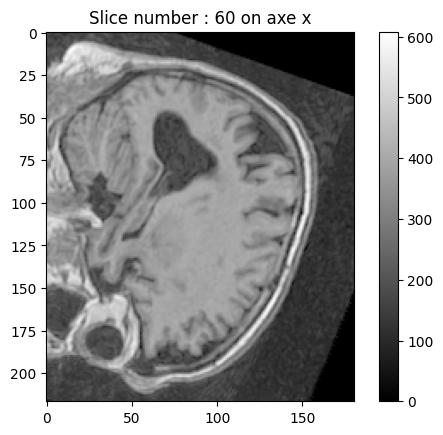

In [11]:
adj = AdjustContrast(0.5)
im = adj(img.copy())
show_2D(im, 60, "x")

In [9]:
aff = Affine()
im = aff(img.copy())
show_2D(im, 60, "x")

TypeError: tuple indices must be integers or slices, not tuple

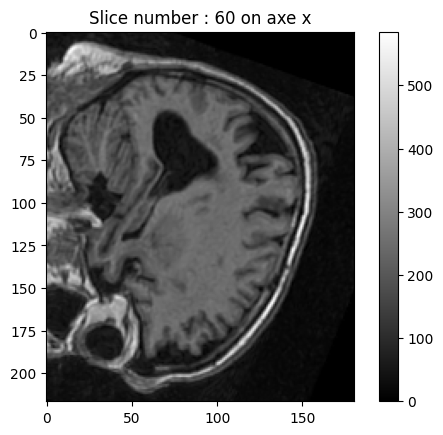

In [11]:
bias = RandBiasField()
im = bias(img.copy())
show_2D(im, 60, "x")

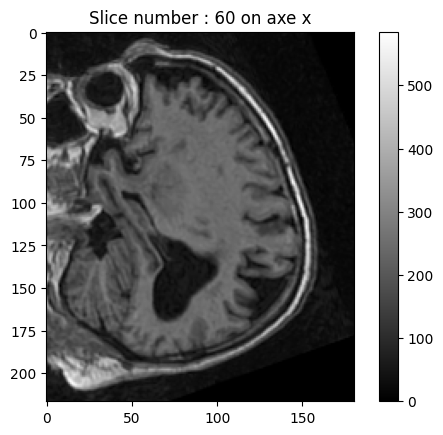

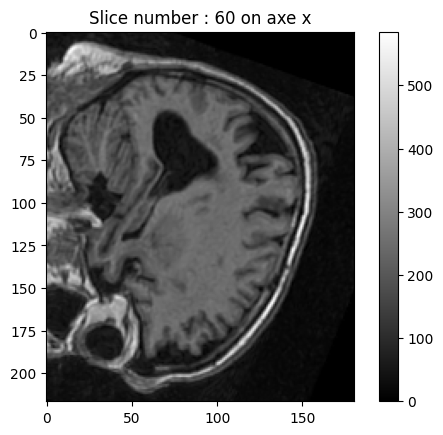

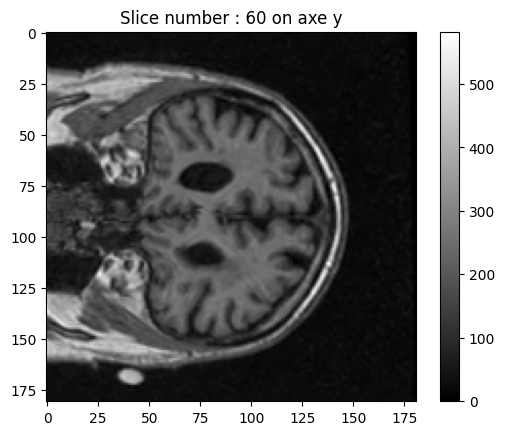

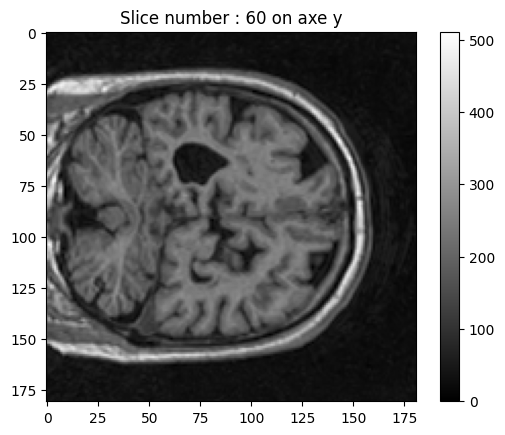

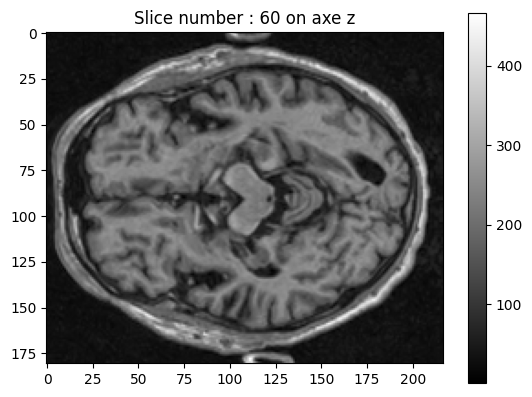

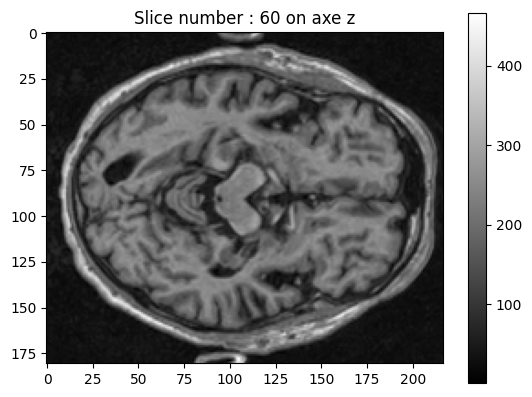

In [42]:
flip = Flip(0)
# rot = Rotate90(k=1, spatial_axes=(1,0))
im = flip(img.copy())
# im = rot(im)
show_2D(im, 60, "x")
show_2D(img, 60, "x")
show_2D(im, 60, "y")
show_2D(img, 60, "y")
show_2D(im, 60, "z")
show_2D(img, 60, "z")

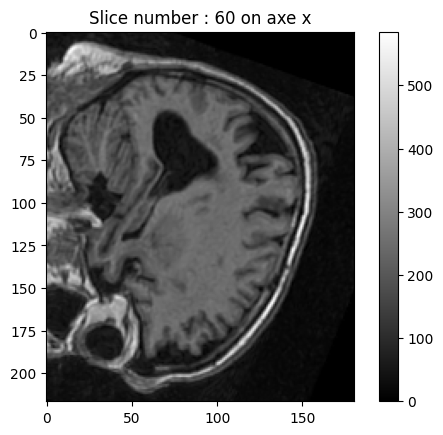

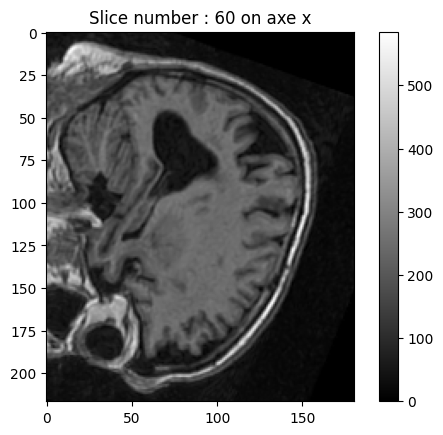

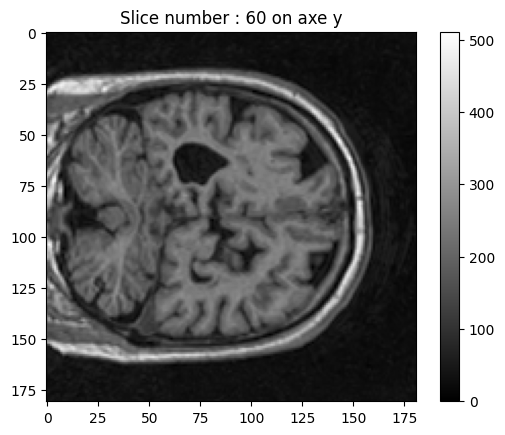

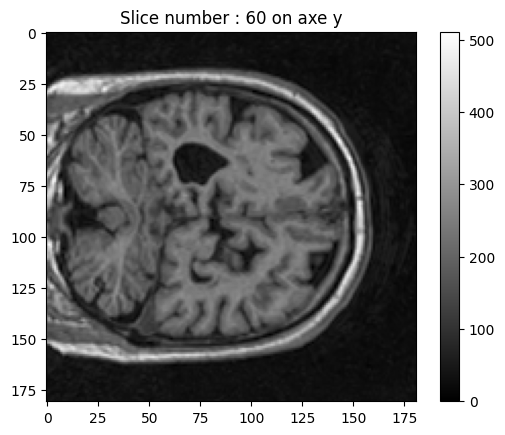

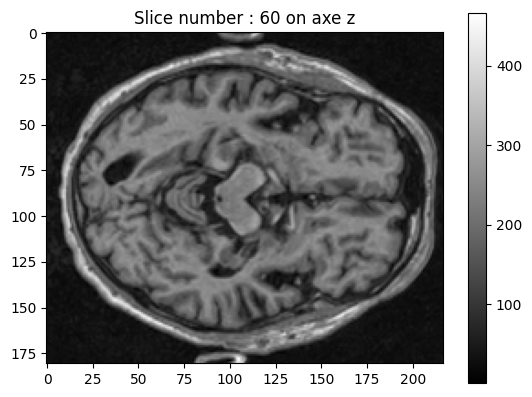

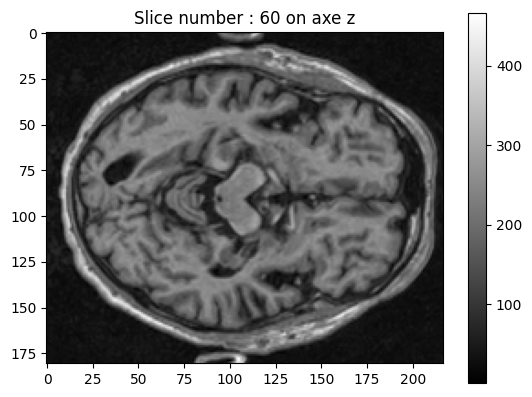

In [61]:
flip = Flip(0)
im = flip(img.copy())
ori = Orientation(axcodes='RAS', labels=(('L', 'R'), ('P', 'A'), ('S', 'I')))

im = ori(im)

show_2D(im, 60, "x")
show_2D(img, 60, "x")
show_2D(im, 60, "y")
show_2D(img, 60, "y")
show_2D(im, 60, "z")
show_2D(img, 60, "z")

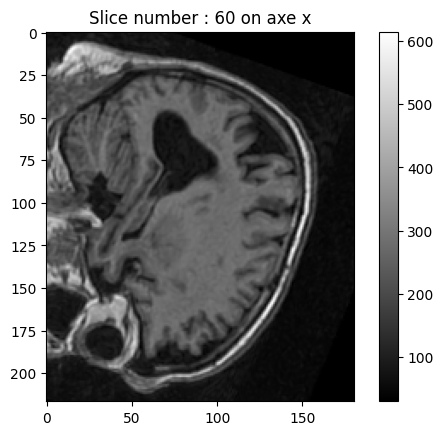

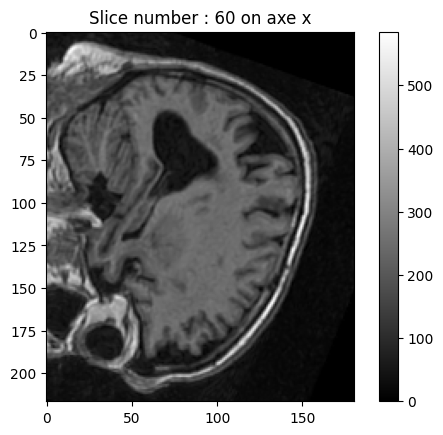

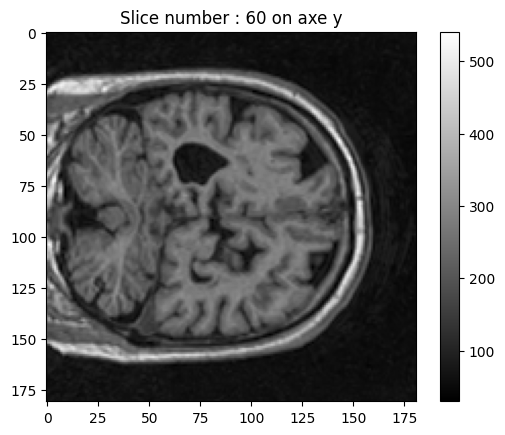

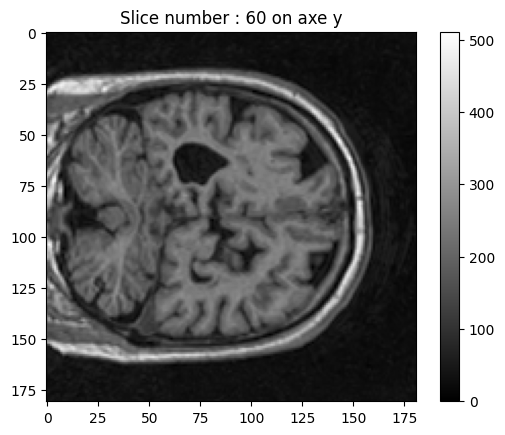

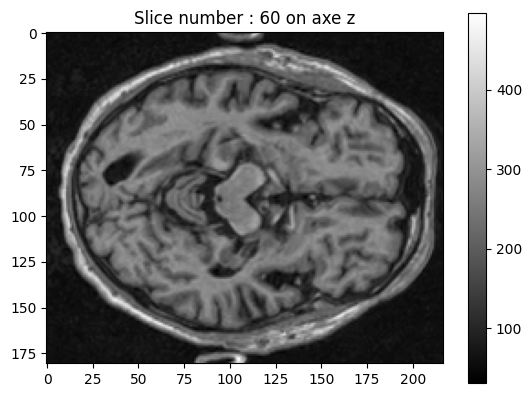

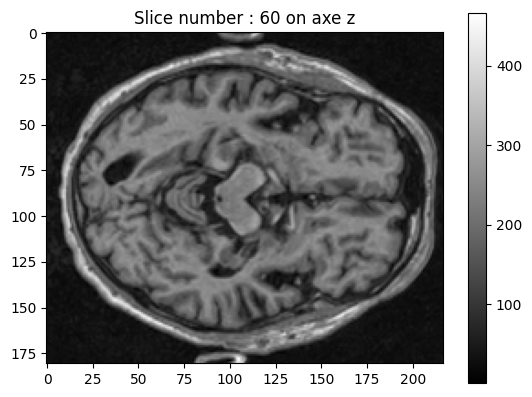

In [64]:
intens = ShiftIntensity(30)

im = intens(img.copy())

show_2D(im, 60, "x")
show_2D(img, 60, "x")
show_2D(im, 60, "y")
show_2D(img, 60, "y")
show_2D(im, 60, "z")
show_2D(img, 60, "z")

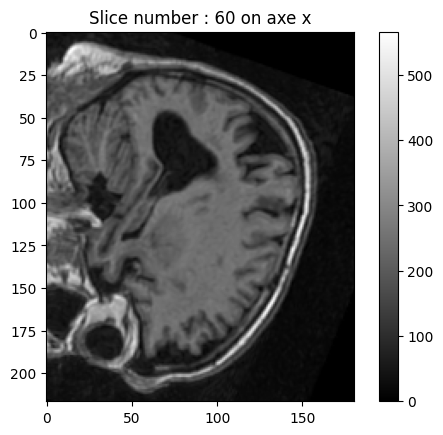

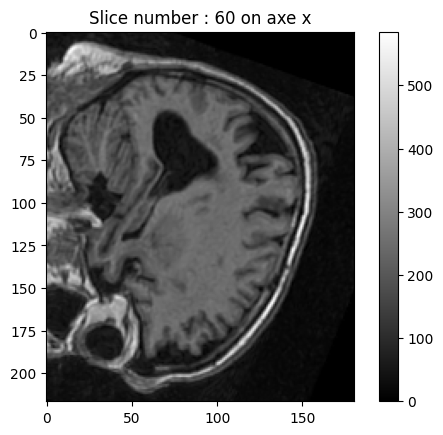

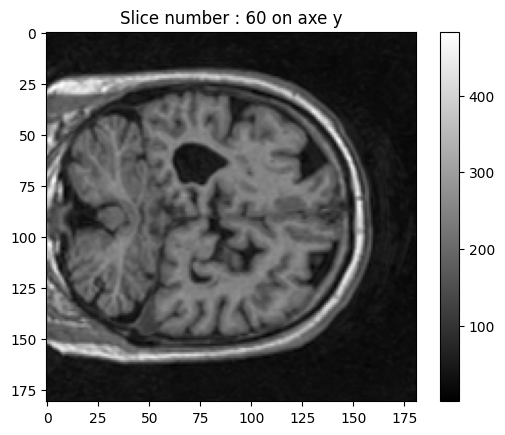

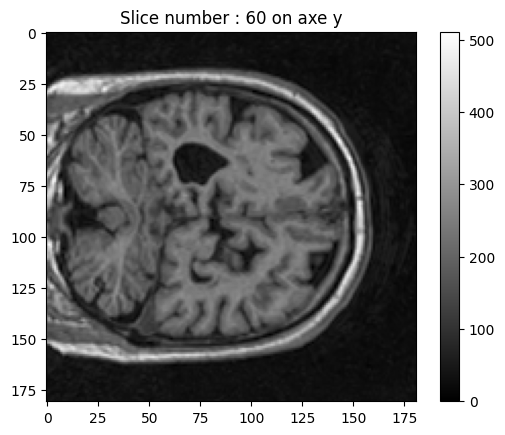

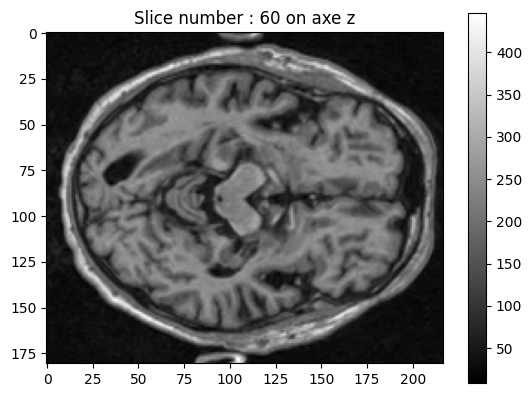

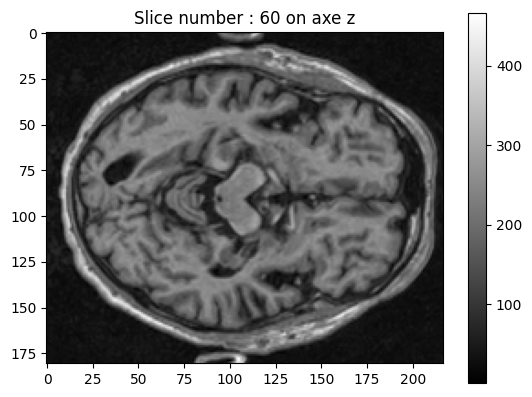

In [37]:
el = Rand3DElastic((50,100),(50,1000), prob=1.0)

im = el(img.copy())

show_2D(im, 60, "x")
show_2D(img, 60, "x")
show_2D(im, 60, "y")
show_2D(img, 60, "y")
show_2D(im, 60, "z")
show_2D(img, 60, "z")